## *pandas* Refresher<a id="0"></a>

The course heavily relies on *pandas* for data wrangling, analysis. Refresh your Panads skill quickly with the lab on [Data pre-processing with Pandas](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/v4/DV0101EN-Exercise-Dataset-Preprocessing-Exploring-with-Pandas.ipynb)

*pandas* is an essential data analysis toolkit for Python.
<br>
#### We encourage you to spend some time and familiarize yourself with the *pandas*  from the [website](http://pandas.pydata.org/)


### The Dataset: Immigration to Canada from 1980 to 2013 <a id="2"></a>


Dataset Source: [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows).
In this lab, we will focus on the Canadian immigration data. <br><br>We have already **pre-processed** the data, we will use the **clean data** saved in the csv format for this lab.
The Canada Immigration dataset can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv">here</a>.

---


Next, we'll do is import two key data analysis modules: *pandas* and *numpy*


In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [2]:
df_can = pd.read_csv('Canada.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the `head()` function.


In [3]:
df_can.head()
# tip: You can specify the number of rows you'd like to see as follows: df_can.head(10) 

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


Let's set Country as the index, it will help you to plot the charts easily, by refering to the country names as index value


In [4]:
df_can.set_index('Country', inplace=True)
# tip: The opposite of set is reset. So to reset the index, we can use df_can.reset_index()

In [5]:
#let's check
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [6]:
# optional: to remove the name of the index
df_can.index.name = None

Since we converted the years to string, let's declare a variable that will allow us to easily call upon the full range of years:


In [7]:
# useful for plotting later on
years = list(map(str, range(1980, 2014)))
print(years)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


---
# Visualizing Data using Matplotlib<a id="8"></a>


## Matplotlib: Standard Python Visualization Library<a id="3"></a>

The primary plotting library we will explore in the course is [Matplotlib](http://matplotlib.org/).  As mentioned on their website: 
>Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

If you are aspiring to create impactful visualization with python, Matplotlib is an essential tool to have at your disposal.


### Matplotlib.Pyplot

One of the core aspects of Matplotlib is `matplotlib.pyplot`. It is Matplotlib's scripting layer which we studied in details in the videos about Matplotlib. Recall that it is a collection of command style functions that make Matplotlib work like MATLAB. Each `pyplot` function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In this lab, we will work with the scripting layer to learn how to generate line plots. In future labs, we will get to work with the Artist layer as well to experiment first hand how it differs from the scripting layer. 


Let's start by importing `matplotlib` and `matplotlib.pyplot` as follows:


In [8]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

*optional: check if Matplotlib is loaded.


In [9]:
print('Matplotlib version: ', mpl.__version__)  # >= 2.0.0

Matplotlib version:  3.3.4


### Plotting in *pandas*

Fortunately, pandas has a built-in implementation of Matplotlib that we can use. Plotting in *pandas* is as simple as appending a `.plot()` method to a series or dataframe.

Documentation:
- [Plotting with Series](http://pandas.pydata.org/pandas-docs/stable/api.html#plotting)<br>
- [Plotting with Dataframes](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting)


# Line Pots (Series/Dataframe) <a id="4"></a>


**What is a line plot and why use it?**

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields.
Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.


**Let's start with a case study:**

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and about three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a `Line` plot:

**Question:** Plot a line graph of immigration from Haiti using `df.plot()`.


First, we will extract the data series for Haiti.


In [10]:
#Since we converted the years to string, 
#let's declare a variable that will allow us to easily call upon the full range of years:
years = list(map(str, range(1980, 2014)))
#creating data series
haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

Next, we will plot a line plot by appending `.plot()` to the `haiti` dataframe.


<AxesSubplot:>

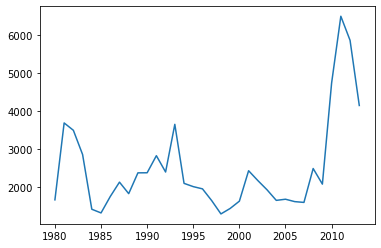

In [11]:
haiti.plot()

*pandas* automatically populated the x-axis with the index values (years), and the y-axis with the column values (population). <br>

Also, let's label the x and y axis using `plt.title()`, `plt.ylabel()`, and `plt.xlabel()` as follows:


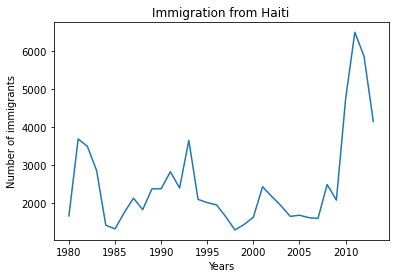

In [12]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti. Let's annotate this spike in the plot by using the `plt.text()` method.<br>
<br>
However, notice that years are of type *string*. Let's change the type of the index values to *integer* first.


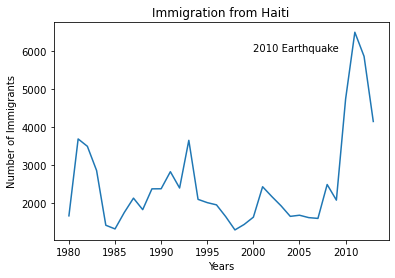

In [13]:
haiti.index = haiti.index.map(int) 
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show() 

With just a few lines of code, you were able to quickly identify and visualize the spike in immigration!

Quick note on x and y values in `plt.text(x, y, label)`:
    
     Since the x-axis (years) is type 'integer', we specified x as a year. The y axis (number of immigrants) is type 'integer', so we can just specify the value y = 6000.
    
```python
    plt.text(2000, 6000, '2010 Earthquake') # years stored as type int
```
    If the years were stored as type 'string', we would need to specify x as the index position of the year. Eg 20th index is year 2000 since it is the 20th year with a base year of 1980.
```python
    plt.text(20, 6000, '2010 Earthquake') # years stored as type int
```
    We will cover advanced annotation methods in later modules.


Plotly is a library that allows you to create interactive plots that you can use in dashboards or websites (you can save them as html files or static images).

## Installation

In order for this all to work, you'll need to install plotly and cufflinks to call plots directly off of a pandas dataframe. These libraries are not currently available through **conda** but are available through **pip**. Install the libraries at your command line/terminal using:

    pip install plotly
    pip install cufflinks

** NOTE: Make sure you only have one installation of Python on your computer when you do this, otherwise the installation may not work. **



# same but using plotly and cufflinks

## Using Cufflinks and iplot()

* scatter
* bar
* box
* spread
* ratio
* heatmap
* surface
* histogram
* bubble

In [14]:
# plotly with cufflinks

In [22]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

print(__version__) # requires version >= 1.9.0

5.19.0


In [23]:
import cufflinks as cf

In [24]:
# For Notebooks
init_notebook_mode(connected=True)

In [25]:
# For offline use
cf.go_offline()

In [26]:
# Assuming you have already defined `haiti` as a pandas Series containing the data

# Convert index to integers
haiti.index = haiti.index.map(int)

# Create a scatter plot using Cufflinks
fig = haiti.iplot(kind='scatter', mode='lines+markers', title='Immigration from Haiti',
                  xTitle='Years', yTitle='Number of Immigrants', dimensions=(800, 500), asFigure=True)

# Add annotation for the 2010 Earthquake
fig.add_trace(go.Scatter(x=[2010], y=[haiti[2010]], mode='markers', name='2010 Earthquake',
                         marker=dict(color='red', size=10), showlegend=False,
                         text=['2010 Earthquake'], textposition='bottom center'))

# Show the plot
fig.show()


# Area Plots<a id="6"></a>


In the last module, we created a line plot that visualized the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013. With a little modification to the code, we can visualize this plot as a cumulative plot, also knows as a **Stacked Line Plot** or **Area plot**.


In [27]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()

,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Area plots are stacked by default. And to produce a stacked area plot, each column must be either all positive or all negative values (any `NaN`, i.e. not a number, values will default to 0). To produce an unstacked plot, set parameter `stacked` to value `False`.


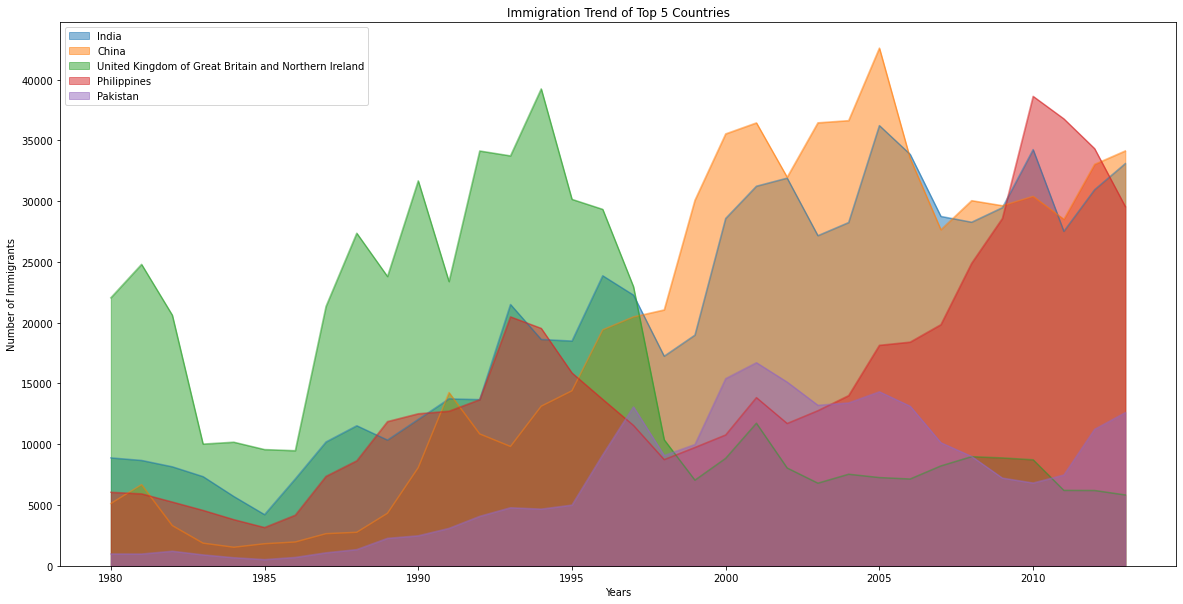

In [28]:
# let's change the index values of df_top5 to type integer for plotting
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

### Two types of plotting

As we discussed in the video lectures, there are two styles/options of plotting with `matplotlib`， plotting using the Artist layer and plotting using the scripting layer.

**Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as 'plt'**

You can use `plt` i.e. `matplotlib.pyplot` and add more elements by calling different methods procedurally; for example, `plt.title(...)` to add title or `plt.xlabel(...)` to add label to the x-axis.

```python
    # Option 1: This is what we have been using so far
    df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10)) 
    plt.title('Immigration trend of top 5 countries')
    plt.ylabel('Number of immigrants')
    plt.xlabel('Years')
```


**Option 2: Artist layer (Object oriented method) - using an `Axes` instance from Matplotlib (preferred)**

You can use an `Axes` instance of your current plot and store it in a variable (eg. `ax`). You can add more elements by calling methods with a little change in syntax (by adding "`set_`" to the previous methods). For example, use `ax.set_title()` instead of `plt.title()` to add title,  or `ax.set_xlabel()` instead of `plt.xlabel()` to add label to the x-axis.

This option sometimes is more transparent and flexible to use for advanced plots (in particular when having multiple plots, as you will see later).

In this course, we will stick to the **scripting layer**, except for some advanced visualizations where we will need to use the **artist layer** to manipulate advanced aspects of the plots.


Text(0.5, 0, 'Years')

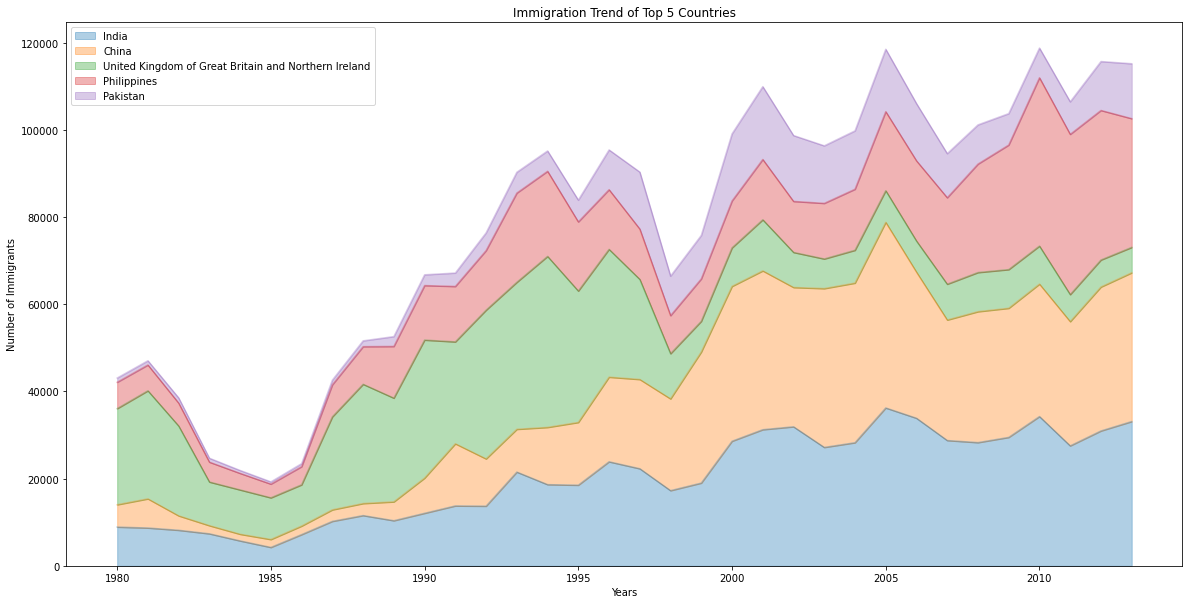

In [29]:
# option 2: preferred option with more flexibility
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

# using plotly and cufflinks

In [30]:
# Assuming you have already defined `df_top5` as a DataFrame containing the top 5 countries' immigration data
# Create a Plotly figure using Cufflinks
fig = df_top5.iplot(kind='area', 
                                xTitle='Years', 
                                yTitle='Number of Immigrants', 
                                title='Immigration Trend of Top 5 Countries',
                                colorscale='set1',  # Set the colorscale
                                fill=True,  # Enable area filling
                                opacity=0.5,  # Set opacity
                                theme='pearl',  # Set plot theme
                                dimensions=(900, 500)  # Set plot dimensions
                               )

# Show the Plotly figure
#fig.show()

# Histograms<a id="8"></a>

A histogram is a way of representing the *frequency* distribution of numeric dataset. The way it works is it partitions the x-axis into *bins*, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.


**Question:** What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?


Before we proceed with creating the histogram plot, let's first examine the data split into intervals. To do this, we will us **Numpy**'s `histrogram` method to get the bin ranges and frequency counts as follows:


In [31]:
# let's quickly view the 2013 data
df_can['2013'].head()

India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [32]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


By default, the `histrogram` method breaks up the dataset into 10 bins. The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013. We can see that in 2013:

*   178 countries contributed between 0 to 3412.9 immigrants
*   11 countries contributed between 3412.9 to 6825.8 immigrants
*   1 country contributed between 6285.8 to 10238.7 immigrants, and so on..

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%202/images/Mod2Fig1-Histogram.jpg" align="center" width="800">


We can easily graph this distribution by passing `kind=hist` to `plot()`.


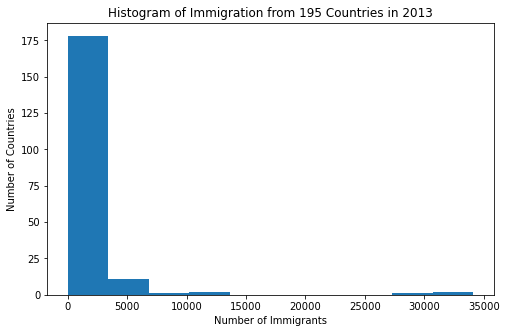

In [33]:
df_can['2013'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Histogram of Immigration from 195 Countries in 2013')
# add y-label
plt.ylabel('Number of Countries')
# add x-label
plt.xlabel('Number of Immigrants')

plt.show()

In the above plot, the x-axis represents the population range of immigrants in intervals of 3412.9. The y-axis represents the number of countries that contributed to the aforementioned population.

Notice that the x-axis labels do not match with the bin size. This can be fixed by passing in a `xticks` keyword that contains the list of the bin sizes, as follows:


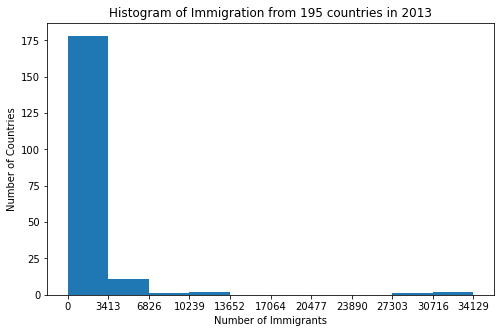

In [34]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

*Side Note:* We could use `df_can['2013'].plot.hist()`, instead. In fact, throughout this lesson, using `some_data.plot(kind='type_plot', ...)` is equivalent to `some_data.plot.type_plot(...)`. That is, passing the type of the plot as argument or method behaves the same.

See the *pandas* documentation for more info  [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).


# using plotly and cufflinks

In [35]:
# Create a histogram trace using Cufflinks
histogram = df_can['2013'].iplot(kind='histogram', bins=len(bin_edges),
                                  xTitle='Number of Immigrants', yTitle='Number of Countries',
                                  title='Histogram of Immigration from 195 countries in 2013',
                                  dimensions=(800, 500), asFigure=True)

# Update the layout
histogram.update_layout(showlegend=False)

# Show the histogram
histogram.show()

We can also plot multiple histograms on the same plot. For example, let's try to answer the following questions using a histogram.

**Question**: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?


In [36]:
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.iplot(kind ='hist', 
         # figsize=(10, 6),
          bins=15,
          #alpha=0.6,
         # xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

# Bar Charts (Dataframe) <a id="10"></a>

A bar plot is a way of representing data where the *length* of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals.

To create a bar plot, we can pass one of two arguments via `kind` parameter in `plot()`:

*   `kind=bar` creates a *vertical* bar plot
*   `kind=barh` creates a *horizontal* bar plot


**Vertical bar plot**

In vertical bar graphs, the x-axis is used for labelling, and the length of bars on the y-axis corresponds to the magnitude of the variable being measured. Vertical bar graphs are particularly useful in analyzing time series data. One disadvantage is that they lack space for text labelling at the foot of each bar.

**Let's start off by analyzing the effect of Iceland's Financial Crisis:**

The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

**Question:** Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.


In [37]:
# step 1: get the data
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

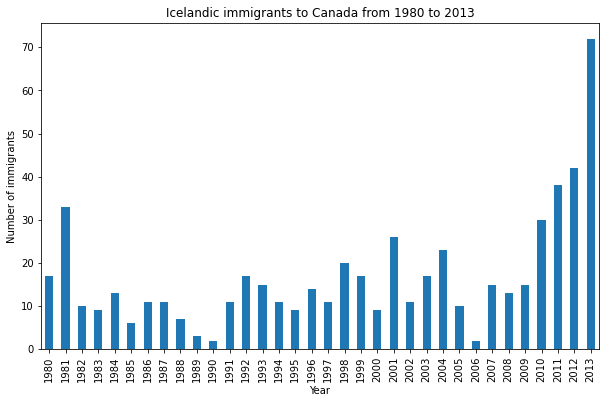

In [38]:
# step 2: plot data
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008.

Let's annotate this on the plot using the `annotate` method of the **scripting layer** or the **pyplot interface**. We will pass in the following parameters:

*   `s`: str, the text of annotation.
*   `xy`: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
*   `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
*   `xycoords`: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
*   `arrowprops`: Takes a dictionary of properties to draw the arrow:
    *   `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow.
    *   `connectionstyle`: Specifies the connection type. `arc3` is a straight line.
    *   `color`: Specifies color of arrow.
    *   `lw`: Specifies the line width.

I encourage you to read the Matplotlib documentation for more details on annotations:
<https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html>.


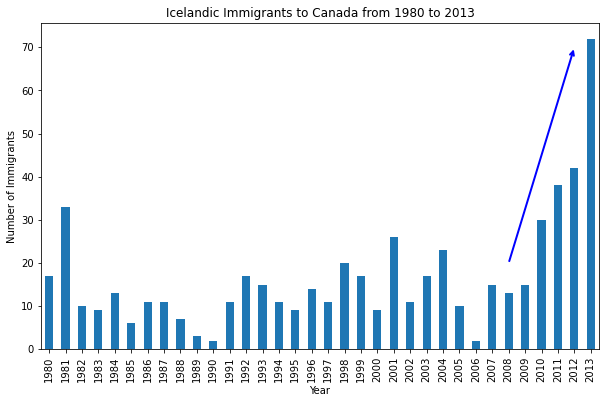

In [39]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)  # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.show()

Let's also annotate a text to go over the arrow.  We will pass in the following additional parameters:

*   `rotation`: rotation angle of text in degrees (counter clockwise)
*   `va`: vertical alignment of text \[‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
*   `ha`: horizontal alignment of text \[‘center’ | ‘right’ | ‘left’]


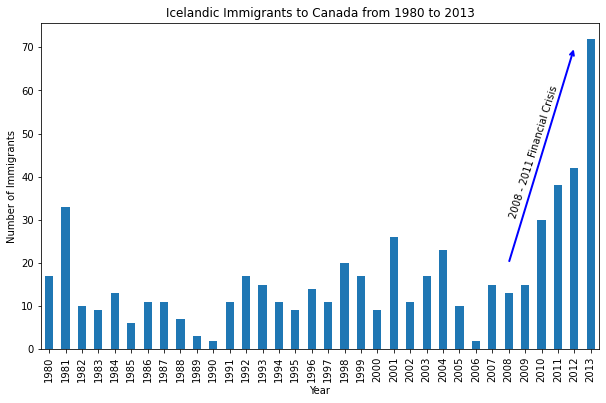

In [40]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

# using plotly and cufflinks

In [41]:
# using plotly and cufflinks

In [42]:
import cufflinks as cf
import plotly.graph_objs as go

# Assuming you have already defined `df_iceland` as a pandas Series containing the data

# Create a bar plot using Cufflinks
bar_plot = df_iceland.iplot(kind='bar', xTitle='Year', yTitle='Number of Immigrants',
                            title='Icelandic Immigrants to Canada from 1980 to 2013',
                            dimensions=(800, 500), asFigure=True)

# Add arrow annotation
bar_plot.add_annotation(x=32, y=70, xref="x", yref="y",
                        ax=28, ay=20,
                        showarrow=True, arrowhead=3, arrowsize=1, arrowwidth=2,
                        arrowcolor="blue", axref="x", ayref="y")

# Add text annotation
bar_plot.add_annotation(x=30, y=40, xref="x", yref="y",
                        text="2008 - 2011 Financial Crisis",
                        textangle=-72.5, align="center")

# Update layout
bar_plot.update_layout(xaxis_tickangle=-90, showlegend=False)

# Show the plot
bar_plot.show()


# Pie Charts <a id="6"></a>

A `pie chart` is a circular graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the `kind=pie` keyword.

Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.


Step 1: Gather data.

We will use *pandas* `groupby` method to summarize the immigration data by `Continent`. The general process of `groupby` involves the following steps:

1.  **Split:** Splitting the data into groups based on some criteria.
2.  **Apply:** Applying a function to each group independently:
    .sum()
    .count()
    .mean()
    .std()
    .aggregate()
    .apply()
    .etc..
3.  **Combine:** Combining the results into a data structure.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig4SplitApplyCombine.png" height="400" align="center">


In [43]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


Step 2: Plot the data. We will pass in `kind = 'pie'` keyword, along with the following additional parameters:

*   `autopct` -  is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.
*   `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
*   `shadow` - Draws a shadow beneath the pie (to give a 3D feel).


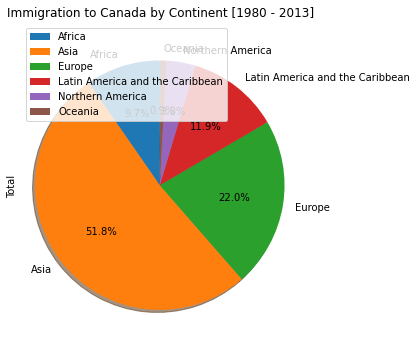

In [44]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_continents.index, loc='upper left') 


plt.show()

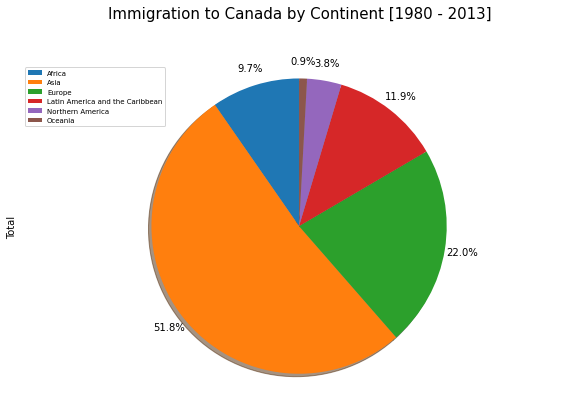

In [45]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            #colors=colors_list,  # add custom colors
                            #explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12, fontsize = 15) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left', fontsize=7) 

plt.show()

# using plotly and cufflinks

In [46]:
import plotly.express as px
import numpy
 
# Random Data
random_x = df_continents['Total']
names = df_continents.index.to_list()
 
fig = px.pie(values=random_x, names=names,title="Immigration to Canada by Continent [1980 - 2013]")
fig.show()

# Box Plots <a id="8"></a>

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions:

*   **Minimum:** The smallest number in the dataset excluding the outliers.
*   **First quartile:** Middle number between the `minimum` and the `median`.
*   **Second quartile (Median):** Middle number of the (sorted) dataset.
*   **Third quartile:** Middle number between `median` and `maximum`.
*   **Maximum:** The largest number in the dataset excluding the outliers.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/boxplot_complete.png" width="440," align="center">


To make a `boxplot`, we can use `kind=box` in `plot` method invoked on a *pandas* series or dataframe.

Let's plot the box plot for the Japanese immigrants between 1980 - 2013.


Step 1: Get the subset of the dataset. Even though we are extracting the data for just one country, we will obtain it as a dataframe. This will help us with calling the `dataframe.describe()` method to view the percentiles.


In [47]:
# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


Step 2: Plot by passing in `kind='box'`.


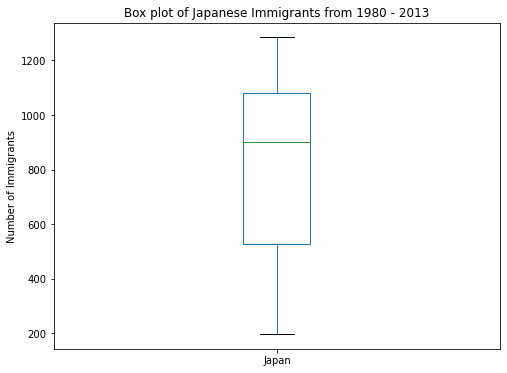

In [48]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

We can immediately make a few key observations from the plot above:

1.  The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and  median number of immigrants is around 900 (median).
2.  25% of the years for period 1980 - 2013 had an annual immigrant count of \~500 or fewer (First quartile).
3.  75% of the years for period 1980 - 2013 had an annual immigrant count of \~1100 or fewer (Third quartile).

We can view the actual numbers by calling the `describe()` method on the dataframe.


In [49]:
df_japan.describe()

,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


# using plotly and cufflinks

In [50]:
# Create the box plot
box_plot = df_japan.iplot(kind='box', 
                          title='Box plot of Japanese Immigrants from 1980 - 2013', 
                          yTitle='Number of Immigrants', 
                          asFigure=True)

# Show the plot
box_plot.show()

**Subplots**

Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**.

Typical syntax is : <br>

```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```

Where

*   `nrows` and `ncols` are used to notionally split the figure into (`nrows` \* `ncols`) sub-axes,
*   `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` \* `ncols` as shown below.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig5Subplots_V2.png" width="500" align="center">


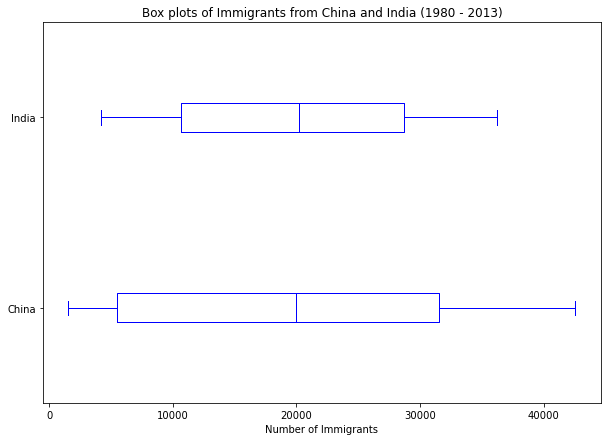

In [51]:
df_CI= df_can.loc[['China', 'India'], years].transpose()
df_CI.head()
# horizontal box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

# using plotly and cufflinks

In [52]:
# Create the box plot
box_plot = df_CI.iplot(kind='box', 
                       layout=dict(title='Box plots of Immigrants from China and India (1980 - 2013)', 
                                   yaxis=dict(title='Number of Immigrants')), 
                       colors=['blue', 'green'], 
                       asFigure=True)

# Show the plot
box_plot.show()

We can then specify which subplot to place each plot by passing in the `ax` paramemter in `plot()` method as follows:


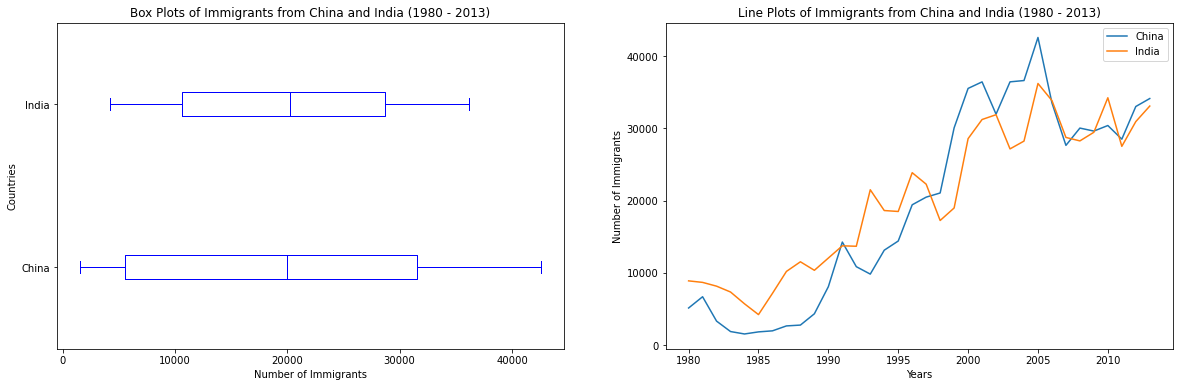

In [53]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

**Tip regarding subplot convention**

In the case when `nrows`, `ncols`, and `plot_number` are all less than 10, a convenience exists such that a 3-digit number can be given instead, where the hundreds represent `nrows`, the tens represent `ncols` and the units represent `plot_number`. For instance,

```python
   subplot(211) == subplot(2, 1, 1) 
```

produces a subaxes in a figure which represents the top plot (i.e. the first) in a 2 rows by 1 column notional grid (no grid actually exists, but conceptually this is how the returned subplot has been positioned).


# Scatter Plots <a id="10"></a>

A `scatter plot` (2D) is a useful method of comparing variables against each other. `Scatter` plots look similar to `line plots` in that they both map independent and dependent variables on a 2D graph. While the data points are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

Let's start by exploring the following:

Using a `scatter plot`, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.


Step 1: Get the dataset. Since we are expecting to use the relationship betewen `years` and `total population`, we will convert `years` to `int` type.


In [54]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Step 2: Plot the data. In `Matplotlib`, we can create a `scatter` plot set by passing in `kind='scatter'` as plot argument. We will also need to pass in `x` and `y` keywords to specify the columns that go on the x- and the y-axis.


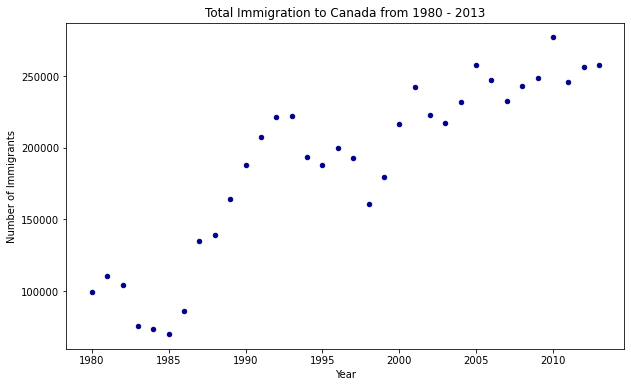

In [55]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

# using plotly and cufflinks

In [56]:
# Create scatter plot
scatter_plot = df_tot.iplot(kind='scatter', x='year', y='total', mode='markers', 
                            xTitle='Year', yTitle='Number of Immigrants',
                            title='Total Immigration to Canada from 1980 - 2013',
                            colors=['darkblue'], symbol='circle', size=8,
                            theme='pearl', asFigure=True)

# Show the plot
scatter_plot.show()

Notice how the scatter plot does not connect the data  points together. We can clearly observe an upward trend in the data: as the years go by, the total number of immigrants increases. We can mathematically analyze this upward trend using a regression line (line of best fit).


So let's try to plot a linear line of best fit, and use it to  predict the number of immigrants in 2015.

Step 1: Get the equation of line of best fit. We will use **Numpy**'s `polyfit()` method by passing in the following:

*   `x`: x-coordinates of the data.
*   `y`: y-coordinates of the data.
*   `deg`: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.


In [57]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression `y= a * x + b`, our output has 2 elements `[5.56709228e+03, -1.09261952e+07]` with the the slope in position 0 and intercept in position 1.

Step 2: Plot the regression line on the `scatter plot`.


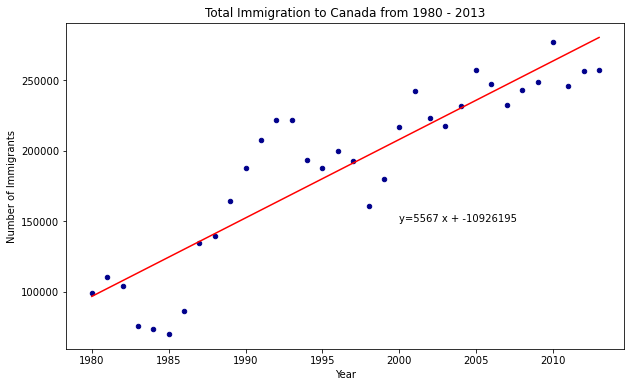

'No. Immigrants = 5567 * Year + -10926195'

In [58]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

# using plotly and cufflinks

In [59]:
# Create scatter plot
scatter_plot = df_tot.iplot(kind='scatter', x='year', y='total', mode='markers', 
                            xTitle='Year', yTitle='Number of Immigrants',
                            title='Total Immigration to Canada from 1980 - 2013',
                            colors=['darkblue'], symbol='circle', size=8,
                            theme='pearl', asFigure=True)

# Calculate the line of best fit
fit = np.polyfit(df_tot['year'], df_tot['total'], 1)
x = np.arange(df_tot['year'].min(), df_tot['year'].max() + 1)

# Add line of best fit to the plot
scatter_plot.add_scatter(x=x, y=fit[0] * x + fit[1], mode='lines', 
                         name='Line of Best Fit', line=dict(color='red'))

# Annotate the line of best fit
scatter_plot['layout']['annotations'] = [
    dict(
        x=2000,
        y=150000,
        xref="x",
        yref="y",
        text='y={0:.0f}x + {1:.0f}'.format(fit[0], fit[1]),
        showarrow=True,
        arrowhead=7,
        ax=0,
        ay=-40
    )
]

# Show the plot
scatter_plot.show()

Using the equation of line of best fit, we can estimate the number of immigrants in 2015:

```python
No. Immigrants = 5567 * Year - 10926195
No. Immigrants = 5567 * 2015 - 10926195
No. Immigrants = 291,310
```

When compared to the actual from Citizenship and Immigration Canada's (CIC) [2016 Annual Report](http://www.cic.gc.ca/english/resources/publications/annual-report-2016/index.asp?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01), we see that Canada accepted 271,845 immigrants in 2015. Our estimated value of 291,310 is within 7% of the actual number, which is pretty good considering our original data came from United Nations (and might differ slightly from CIC data).

As a side note, we can observe that immigration took a dip around 1993 - 1997. Further analysis into the topic revealed that in 1993 Canada introcuded Bill C-86 which introduced revisions to the refugee determination system, mostly restrictive. Further amendments to the Immigration Regulations cancelled the sponsorship required for "assisted relatives" and reduced the points awarded to them, making it more difficult for family members (other than nuclear family) to immigrate to Canada. These restrictive measures had a direct impact on the immigration numbers for the next several years.


# Bubble Plots <a id="12"></a>

A `bubble plot` is a variation of the `scatter plot` that displays three dimensions of data (x, y, z). The data points are replaced with bubbles, and the size of the bubble is determined by the third variable `z`, also known as the weight. In `maplotlib`, we can pass in an array or scalar to the parameter `s` to `plot()`, that contains the weight of each point.

**Let's start by analyzing the effect of Argentina's great depression**.

Argentina suffered a great depression from 1998 to 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.

Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a `bubble plot` of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the *normalized* value of the population for each year.


**Step 1**: Get the data for Brazil and Argentina. Like in the previous example, we will convert the `Years` to type int and include it in the dataframe.


In [60]:
# transposed dataframe
df_can_t = df_can[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


**Step 2**: Create the normalized weights.

There are several methods of normalizations in statistics, each with its own use. In this case, we will use [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) to bring all values into the range \[0, 1]. The general formula is:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig3FeatureScaling.png" align="center">

where $X$ is the original value, $X'$ is the corresponding normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the data points are scaled to a value between 0-1 accordingly.


In [61]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

**Step 3**: Plot the data.

*   To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the `ax` parameter.
*   We will also pass in the weights using the `s` parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore, we will:
    *   multiply weights by 2000 to scale it up on the graph, and,
    *   add 10 to compensate for the min value (which has a 0 weight and therefore scale with $\times 2000$).


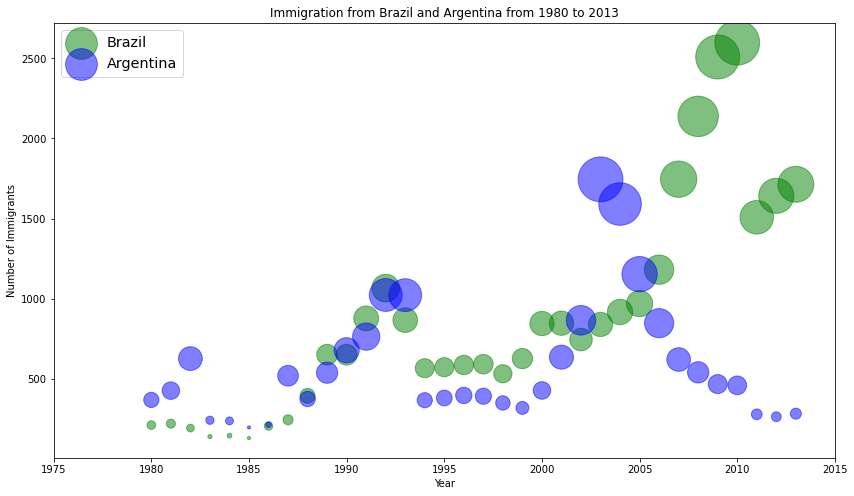

In [62]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble is, the more immigrants are in that year.

From the plot above, we can see a corresponding increase in immigration from Argentina during the 1998 - 2002 great depression. We can also observe a similar spike around 1985 to 1993. In fact, Argentina had suffered a great depression from 1974 to 1990, just before the onset of 1998 - 2002 great depression.

On a similar note, Brazil suffered the *Samba Effect* where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. The immigration data reflect these events.


# Great Job!